In [ ]:
#question 1 

'''Given a training dataset ${(x_i, y_i)}_{i=1}^m$ where $x_i \in \mathbb{R}^n$ and $y_i \in {-1, 1}$, the goal is to find the optimal hyperplane $w^T x + b = 0$ that separates the two classes with maximum margin.'''


In [ ]:
#question 2 

'''
The objective function of a linear Support Vector Machine (SVM) aims to find the hyperplane that maximizes the margin between two classes. The margin is defined as the distance between the hyperplane and the nearest data points from each class (support vectors).'''

In [ ]:
#question 3 

'''
The kernel trick is a technique used in Support Vector Machines (SVM) to handle non-linear classification problems. It allows the SVM to find a hyperplane in a higher-dimensional space without explicitly computing the coordinates of the data in that space. Instead, it uses kernel functions to compute the dot products between the images of all pairs of data points in this high-dimensional space.
'''

In [ ]:
#question 4 

'''
Support vectors play a crucial role in the functioning of Support Vector Machines (SVMs). They are the data points that lie closest to the decision boundary (the hyperplane) and are the most difficult to classify. These points are critical because the position of the hyperplane depends directly on them. Removing a support vector would change the position of the hyperplane, whereas removing any other non-support vector would not affect the decision boundary.
'''

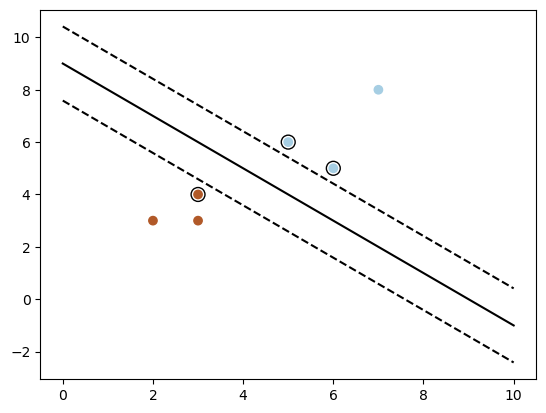

In [2]:
#question 5 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[2, 3], [3, 3], [3, 4], [5, 6], [6, 5], [7, 8]])
y = np.array([1, 1, 1, -1, -1, -1])

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]


margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.axis('tight')
plt.show()


Accuracy of the SVM model: 0.80


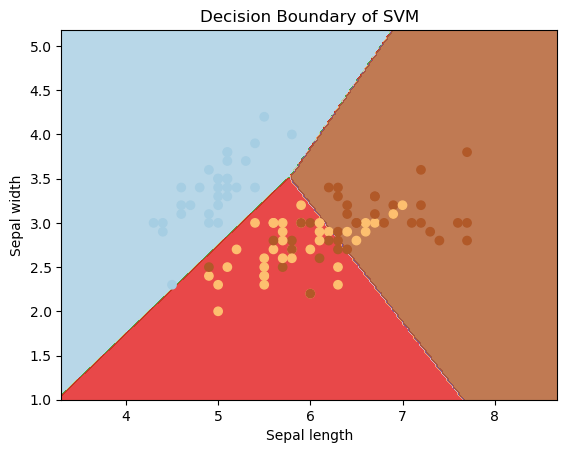

Accuracy with C=0.01: 0.40
Accuracy with C=0.1: 0.82
Accuracy with C=1: 0.80
Accuracy with C=10: 0.80
Accuracy with C=100: 0.80


In [16]:
#question 6 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='linear', C=1.0)  
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision Boundary of SVM')
    plt.show()


plot_decision_boundary(clf, X_train, y_train)

C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy:.2f}")
